<b>Text Compare: Vocabulary and Sentiment</b>

<b><i>Text analysis: comparing vocabulary and sentiment of different texts</i></b>

The books used for the demo are available for free on gutenberg.org.

<u>Usage:</u>

The selected texts schould be placed in the folder where the Jupyter Notebook file is. The format should be simple txt. Then the names of the txt files should be written into the list "text_files".

The code has been written to compare 3 texts.

The following segment loads the given text files

In [1]:
text_files = ['dickens-cities.txt', 'twain-finn.txt', 'stevenson-treasure.txt']
texts = []

for t_f in text_files:
    file = open(t_f, 'r')
    texts.append(file.read())

This function cleans up the text and puts every word into a list.

In [2]:
def get_all_words(text):
    text = text.replace("-", " ")
    text = text.replace(".", " ")
    text = text.replace(",", " ")
    text = text.replace("!", " ")
    text = text.replace("(", " ")
    text = text.replace(")", " ")
    text = text.replace(":", " ")
    text = text.replace("?", " ")
    text = text.replace("’", " ")
    text = text.replace("_", " ")
    text = text.replace("“", " ")
    text = text.replace("”", " ")
    text = text.replace(";", " ")
    text = text.replace("‘", " ")
    
    return(text.lower().split())

words_all_list = []
for text in texts:
    words_all_list.append(get_all_words(text))

This part just prints out the number of words in each text.

In [3]:
print("The number of words in each text:")
for title, text in zip(text_files, words_all_list):
    print(title + " " + str(len(text)))

The number of words in each text:
dickens-cities.txt 138416
twain-finn.txt 117688
stevenson-treasure.txt 70361


This part creates a list of dictionaries with the word as the key and a number for the value meaning the number of occurances for that word ("counted vocab dictionary"). First it deals with the lemmatization, then it counts each word in the text.

If you are runnning nltk the first time, you have to run these commands first:

<i>nltk.download('wordnet')</i>

<i>nltk.download('sentiwordnet')</i>

In [4]:
import nltk
lemma = nltk.wordnet.WordNetLemmatizer()

def get_lemma(w_all):
    for j in range(len(words_all)):
        w_all[j] = lemma.lemmatize(w_all[j])
        w_all[j] = lemma.lemmatize(w_all[j], pos = 'a')
        w_all[j] = lemma.lemmatize(w_all[j], pos = 'v')
    return(w_all)

def count_words(w_all):
    w_set = set(w_all)
    words_count = {}
    for item in w_set:
        words_count[item] = 0
    for item in w_all:
        words_count[item] += 1
    return(words_count)

words_count_list = []
for words_all in words_all_list:
    words_count_list.append(count_words(get_lemma(words_all)))

This part just prints out the vocabulary sizes for each text. (Note that the orders of the texts match between 'text_files', 'words_all_list', and 'words_count_list'.)

In [5]:
print("The vocabulary size for each text:")
for title, text in zip(text_files, words_count_list):
    print(title + " " + str(len(text)))

The vocabulary size for each text:
dickens-cities.txt 6907
twain-finn.txt 4377
stevenson-treasure.txt 4856


This part cross checks the vocabularies between texts. The 'cross_check_vocabs' function takes a list of "counted vocab dictionaries" and gives back a word <u>list</u> with the words that can be found in <u>all</u> the given texts.

In [6]:
def cross_check_vocabs(w_c_l):
    inters = w_c_l[0].keys()
    for w_c in w_c_l:
        inters = inters & w_c.keys()
    return(inters)

In [7]:
inters = cross_check_vocabs(words_count_list)
print("Common vocab size for: " + text_files[0] + ", " + text_files[1] + ", and "  + text_files[2]+ ": " + str(len(inters)))
inters = cross_check_vocabs(words_count_list[:2])
print("Common vocab size for: " + text_files[0] + " and " + text_files[1]+ ": " + str(len(inters)))
inters = cross_check_vocabs(words_count_list[1:])
print("Common vocab size for: " + text_files[1] + " and " + text_files[2]+ ": " + str(len(inters)))
inters = cross_check_vocabs(words_count_list[::2])
print("Common vocab size for: " + text_files[0] + " and " + text_files[2]+ ": " + str(len(inters)))

Common vocab size for: dickens-cities.txt, twain-finn.txt, and stevenson-treasure.txt: 1736
Common vocab size for: dickens-cities.txt and twain-finn.txt: 2406
Common vocab size for: twain-finn.txt and stevenson-treasure.txt: 2018
Common vocab size for: dickens-cities.txt and stevenson-treasure.txt: 2908


This part uses 'matplotlib' to visualize the vocabularies. The venn diagram part of the library also needs to be installed with <i>pip install matplotlib-venn</i>

In [8]:
import matplotlib.pyplot as plt

from matplotlib_venn import venn3

%matplotlib inline

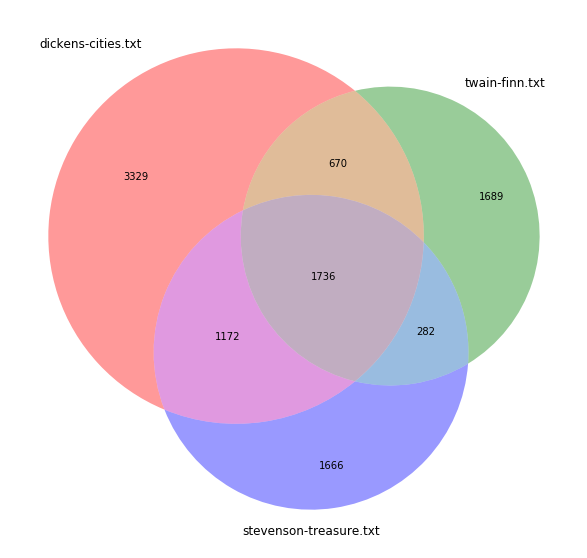

In [9]:
set1 = set(list(words_count_list[0].keys()))
set2 = set(list(words_count_list[1].keys()))
set3 = set(list(words_count_list[2].keys()))

fig = plt.figure(figsize=(20,10))
venn3([set1, set2, set3], (text_files[0], text_files[1], text_files[2]))
plt.show()

Here comes the sentiment analysis using Nltk's Wordnet extensions. The 'senti_100_pos' and 'senti_100_neg' functions will give back a 100 item list each that represent the sentiment along the text. These sentiments are normalized so that texts with different lengths can be compared. The function breaks the text into 100 equal segments. It will collect the sentiments for all existing definitions of the words.

In [10]:
from nltk.corpus import sentiwordnet as swn

In [11]:
def senti_100_pos(w_all):
    pos_sum = 0
    senti_flow_pos = []
    counter = 0
    for item in words_all:
        counter += 1
        for definition_act in list(swn.senti_synsets(item)):
            pos_sum += definition_act.pos_score()
            if counter > len(w_all)/100:
                counter = 0
                senti_flow_pos.append(pos_sum/(len(w_all)/100))
                pos_sum = 0
    return(senti_flow_pos)

def senti_100_neg(w_all):
    neg_sum = 0
    senti_flow_neg = []
    counter = 0
    for item in words_all:
        counter += 1
        for definition_act in list(swn.senti_synsets(item)):
            neg_sum += definition_act.neg_score()
            if counter > len(w_all)/100:
                counter = 0
                senti_flow_neg.append(neg_sum/(len(w_all)/100))
                neg_sum = 0
    return(senti_flow_neg)

pos_senti_list = []
for words_all in words_all_list:
    pos_senti_list.append(senti_100_pos(words_all))

neg_senti_list = []
for words_all in words_all_list:
    neg_senti_list.append(senti_100_neg(words_all))

In [12]:
print("Sum positive sentiment in " + text_files[0] + ": " + str(sum(pos_senti_list[0])))
print("Sum positive sentiment in " + text_files[1] + ": " + str(sum(pos_senti_list[1])))
print("Sum positive sentiment in " + text_files[2] + ": " + str(sum(pos_senti_list[2])))
print("Sum negative sentiment in " + text_files[0] + ": " + str(sum(neg_senti_list[0])))
print("Sum negative sentiment in " + text_files[1] + ": " + str(sum(neg_senti_list[1])))
print("Sum negative sentiment in " + text_files[2] + ": " + str(sum(neg_senti_list[2])))

Sum positive sentiment in dickens-cities.txt: 31.52627369668246
Sum positive sentiment in twain-finn.txt: 37.6749447692203
Sum positive sentiment in stevenson-treasure.txt: 32.73191540768323
Sum negative sentiment in dickens-cities.txt: 27.31528002543059
Sum negative sentiment in twain-finn.txt: 27.852339235945887
Sum negative sentiment in stevenson-treasure.txt: 29.17471610693424


This part draws a figure about how the different sentiments evolve along the first text.

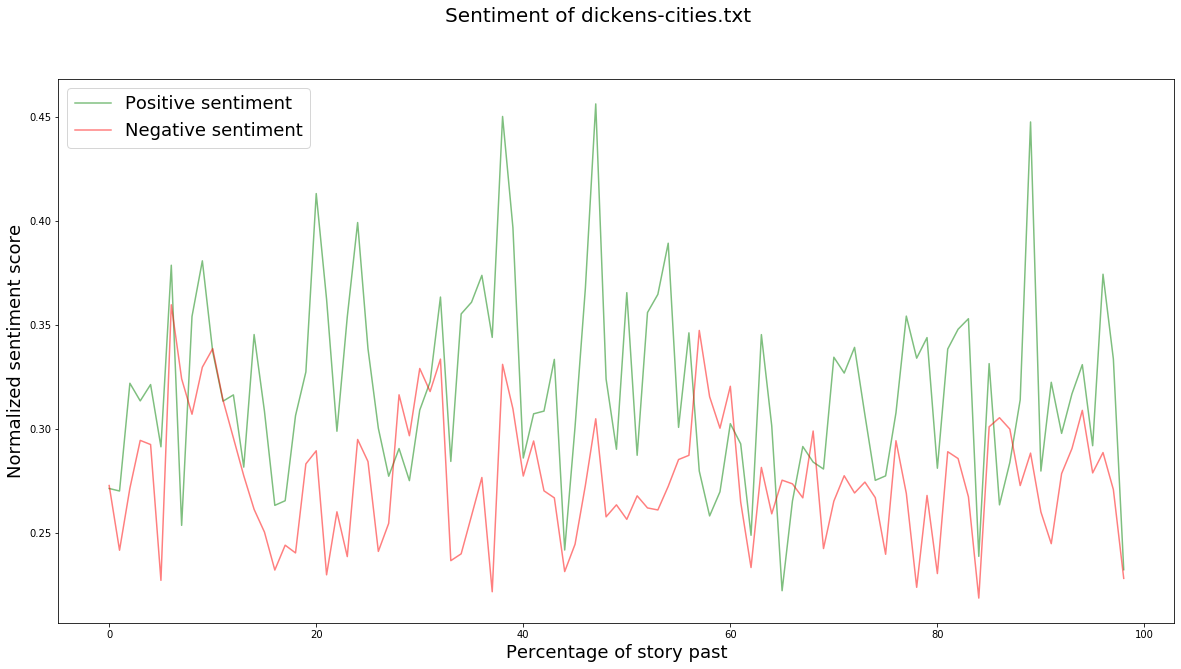

In [13]:
fig = plt.figure(figsize=(20,10))
fig.suptitle("Sentiment of " + text_files[0], fontsize=20)
plt.xlabel('Percentage of story past', fontsize=18)
plt.ylabel('Normalized sentiment score', fontsize=18)
a1 = plt.plot(pos_senti_list[0], color='green', alpha=0.5)
a2 = plt.plot(neg_senti_list[0], color='red', alpha=0.5)
plt.legend(['Positive sentiment', 'Negative sentiment'], fontsize=18, loc=0)

This part draws how the three texts' sentiment evolves compared with each other. The positive and negative sentiments are first summed.

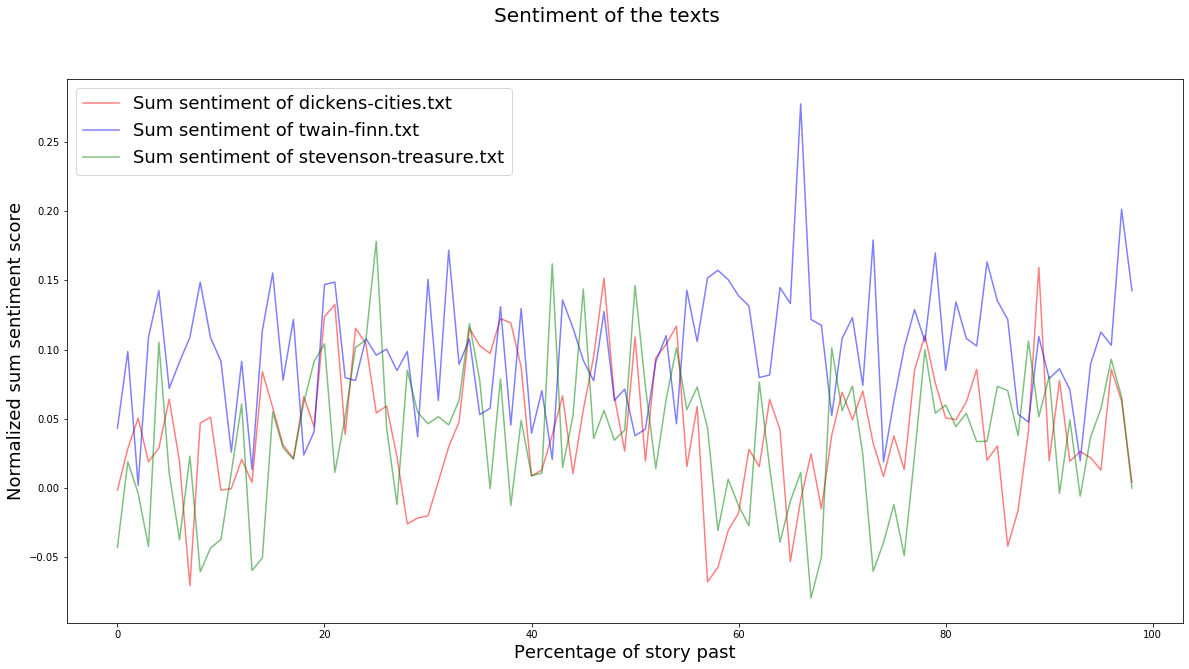

In [14]:
sum_senti_list = []
for p_senti, n_senti in zip(pos_senti_list, neg_senti_list):
    sum_senti_list.append([pos - neg for pos, neg in zip(p_senti, n_senti)])

fig = plt.figure(figsize=(20,10))
fig.suptitle('Sentiment of the texts', fontsize=20)
plt.xlabel('Percentage of story past', fontsize=18)
plt.ylabel('Normalized sum sentiment score', fontsize=18)
a1 = plt.plot(sum_senti_list[0], color='red', alpha=0.5)
a2 = plt.plot(sum_senti_list[1], color='blue', alpha=0.5)
a3 = plt.plot(sum_senti_list[2], color='green', alpha=0.5)
plt.legend(["Sum sentiment of " + text_files[0], "Sum sentiment of " + text_files[1],
            "Sum sentiment of " + text_files[2]], fontsize=18, loc=0)